In [ ]:
import pandas as pd
# Laoding the dataset
data=pd.read_csv('train.tsv',sep='\t')
data.head()


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [ ]:
data.shape

(1482535, 8)

In [ ]:
# Identifying null values
data.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

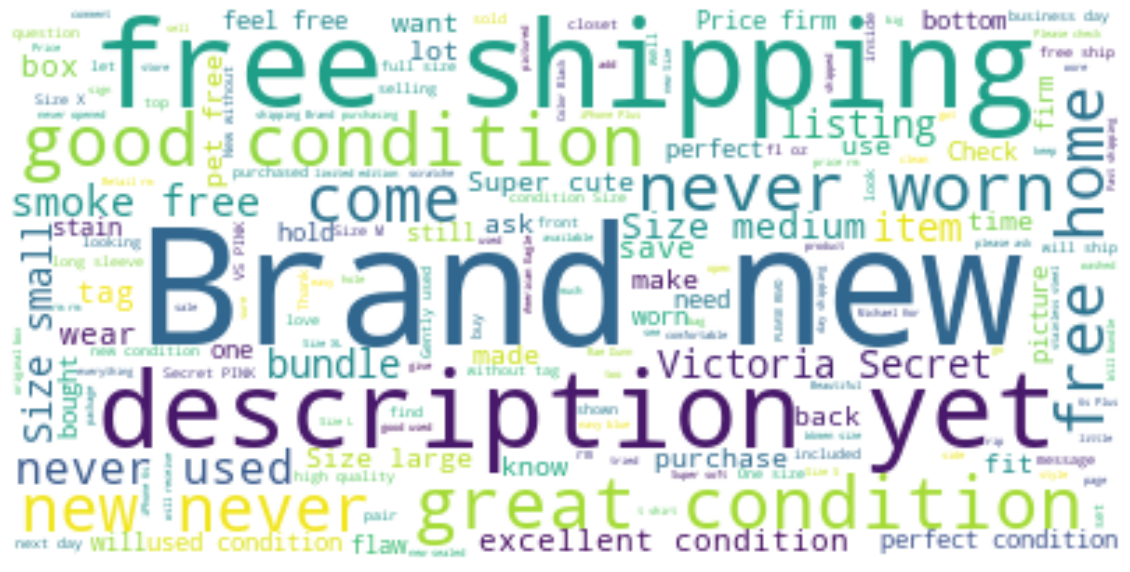

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting word cloud for item description
from matplotlib.pyplot import figure
figure(figsize=(20, 20))
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('item_dsecription.png')
plt.show()


In [ ]:
# List of brands
brands=[str(brands).lower() for brands in data["brand_name"].unique()]
brands

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arnavsaxena/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Extracting missing brand names from item "name" column
def extract_brand(name):
    name_tokens=name.lower().split()
    for n in name_tokens:
        if n in brands and n not in stop:
            return n
    return False
    
imputed_brands=[]
for index, row in data.iterrows():
    if str(row.brand_name)=="nan":
        brand=extract_brand(str(row[1]))
        if brand: 
            imputed_brands.append(brand)
        else: imputed_brands.append("missing")
    else:
        imputed_brands.append(row.brand_name.lower())
            

In [ ]:
data["updated_brand_name"]=imputed_brands

In [ ]:
# Data with updated brand name column
data

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,updated_brand_name
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,mlb
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,razer
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,target
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,missing
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,missing
...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",free people
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,disney
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",missing
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,missing


In [ ]:
# Analyzing price variable distribution
print("Maximum Price: {}".format(max(data["price"])))
print("Minimum Price: {}".format(min(data["price"])))
print("Mean Price: {}".format(np.mean(data["price"])))
print("Median Price: {}".format(np.median(data["price"])))

Maximum Price: 2009.0
Minimum Price: 0.0
Mean Price: 26.737516146330442
Median Price: 17.0


/Users/arnavsaxena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


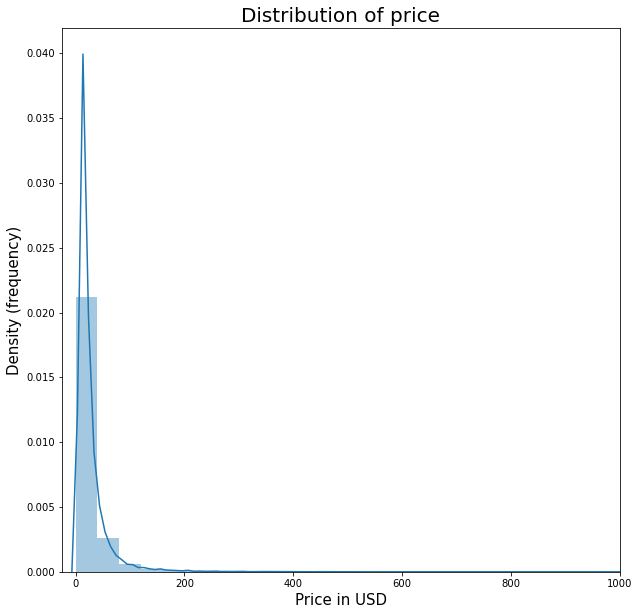

In [ ]:

fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(data['price'],)
ax.set_xlabel("Price in USD", fontsize = 15)
ax.set_ylabel("Density (frequency)", fontsize = 15)
plt.xlim(-25,1000)
ax.set_title("Distribution of price", fontsize=20)
plt.savefig("Skewed Price density.png")



/Users/arnavsaxena/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


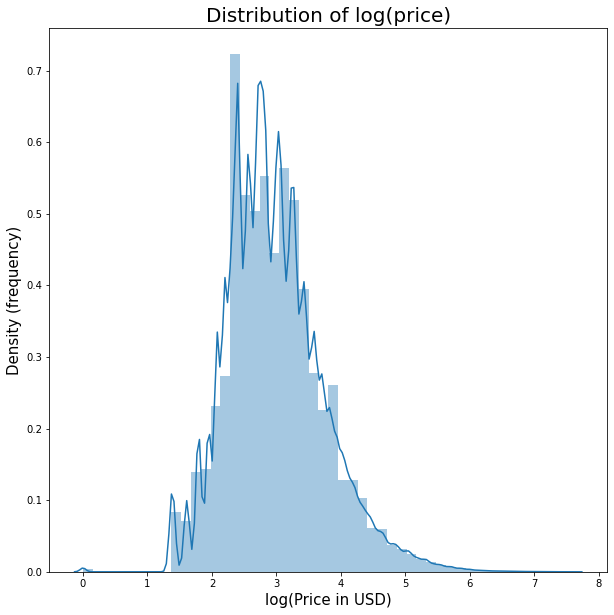

In [ ]:
# Creating log scaled price column
fig,ax = plt.subplots(figsize=(10, 10))
sns.distplot(data['updated_price'],)
ax.set_xlabel("log(Price in USD)", fontsize=15)
ax.set_ylabel("Density (frequency)",fontsize=15)
ax.set_title("Distribution of log(price)",fontsize=20)
plt.savefig("log(Price) density.png")

In [ ]:
data

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,updated_brand_name,updated_price
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,mlb,2.397895
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,razer,3.970292
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,target,2.397895
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,missing,3.583519
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,missing,3.806662
...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",free people,3.044522
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,disney,2.708050
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape.",missing,2.564949
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,missing,3.828641


In [ ]:
# Splitting category columns into different sub categories
data[["first_level_category","second_level_category","third_level_category","0","1"]]=data['category_name'].str.split('/', expand=True)
data=data.drop(columns=["category_name","0","1"])
data.head()

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,first_level_category,second_level_category,third_level_category
0,0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [ ]:
# Analyzing price vs item condition X category
means = data.groupby(['item_condition_id','first_level_category'])['price'].median()
means_df=pd.DataFrame(means)
heatmap=np.asarray(means_df["price"]).reshape(5,10)


In [ ]:
heatmap

array([[15., 12., 10., 20., 15., 25., 13., 16., 17., 24.],
       [15., 19., 14., 16., 14., 21., 14., 17., 14., 19.],
       [15., 19., 16., 16., 14., 20., 14., 18., 16., 17.],
       [12., 24., 14., 13., 13., 20., 13., 16., 16., 15.],
       [10., 25., 11., 14., 14., 21., 14., 18., 14., 14.]])

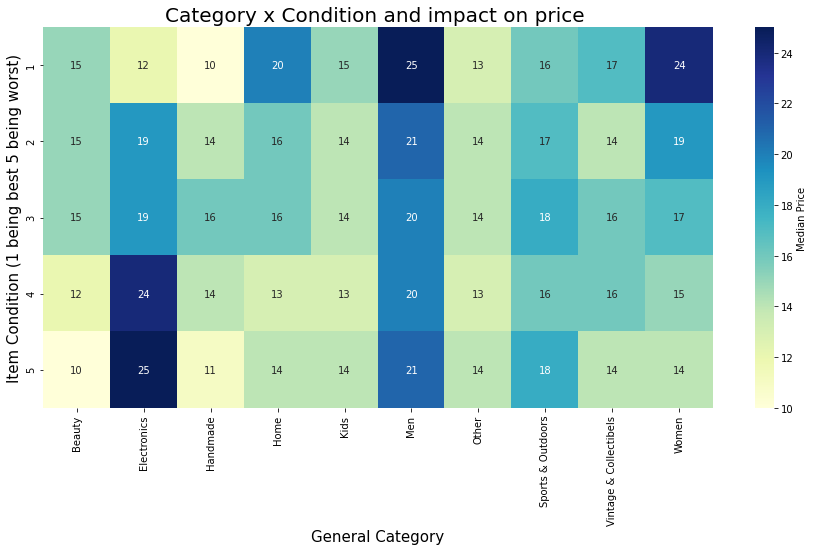

In [ ]:
x_axis_labels = ["Beauty","Electronics","Handmade","Home","Kids","Men","Other","Sports & Outdoors","Vintage & Collectibels","Women"] # labels for x-axis
y_axis_labels = [1,2,3,4,5] # labels for y-axis

fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(heatmap,xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True,cmap="YlGnBu",cbar_kws={'label': 'Median Price'})
ax.set_xlabel("General Category", fontsize = 15)
ax.set_ylabel("Item Condition (1 being best 5 being worst)", fontsize = 15)
ax.set_title("Category x Condition and impact on price ", fontsize=20)
plt.savefig("Heatmap.png")


# create seabvorn heatmap with required labels
#sns.heatmap(flights_df, )

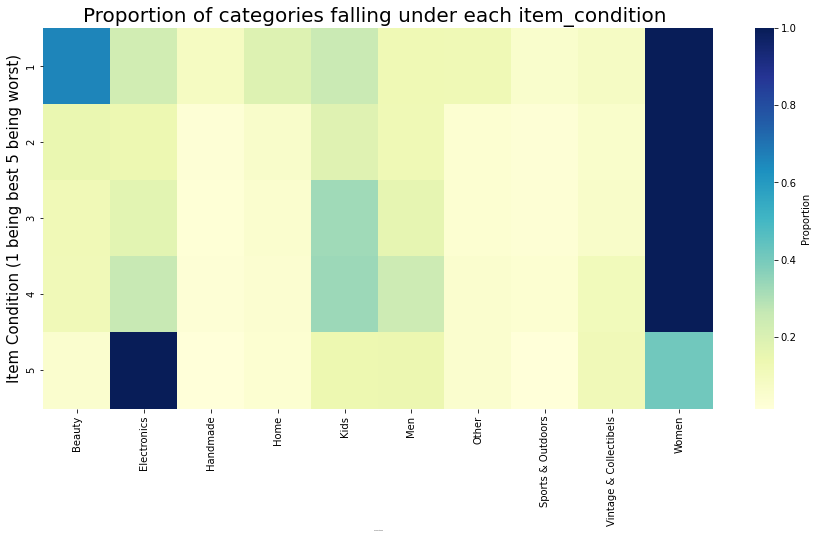

In [ ]:
counts = data.groupby(['item_condition_id','first_level_category'])['price'].count()
count_df=pd.DataFrame(counts)
heatmap_count=np.asarray(count_df["price"]).reshape(5,10)

fig, ax = plt.subplots(figsize=(15, 7))
heatmap_count_normalize = heatmap_count/heatmap_count.max(axis=1, keepdims=True)
sns.heatmap(heatmap_count_normalize,xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap="YlGnBu",cbar_kws={'label': 'Proportion'})
ax.set_xlabel("General Category", fontsize = 1)
ax.set_ylabel("Item Condition (1 being best 5 being worst)", fontsize = 15)
ax.set_title("Proportion of categories falling under each item_condition ", fontsize=20)
plt.savefig("Heatmap2.png")








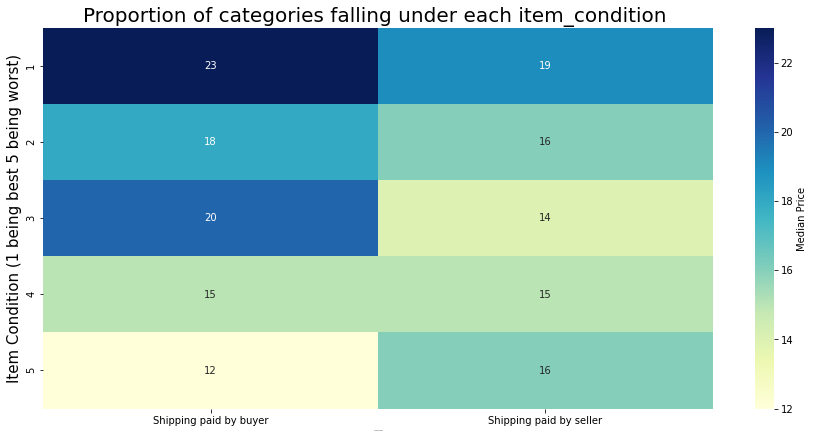

In [ ]:
# Analyzing condition x shipping vs price
shipping_category = data.groupby(['shipping','item_condition_id'])['price'].median()
x_axis_labels = [1,2,3,4,5] # labels for x-axis

shipping_df=pd.DataFrame(shipping_category)
shipping_count=np.asarray(shipping_df["price"]).reshape(5,2)

fig, ax = plt.subplots(figsize=(15, 7))
#heatmap_count_count = shipping_count/heatmap_count.max(axis=1, keepdims=True)
sns.heatmap(shipping_count,xticklabels=["Shipping paid by buyer","Shipping paid by seller"], yticklabels=x_axis_labels,annot=True,cmap="YlGnBu",cbar_kws={'label': 'Median Price'})
ax.set_xlabel("General Category", fontsize = 1)
ax.set_ylabel("Item Condition (1 being best 5 being worst)", fontsize = 15)
ax.set_title("Proportion of categories falling under each item_condition ", fontsize=20)
plt.savefig("Heatmap_shipping.png")




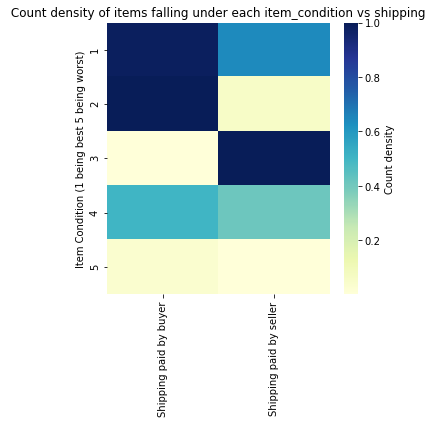

In [ ]:

shipping_category = data.groupby(['shipping','item_condition_id'])['price'].count()
x_axis_labels = [1,2,3,4,5] # labels for x-axis

shipping_df=pd.DataFrame(shipping_category)
shipping_count=np.asarray(shipping_df["price"]).reshape(5,2)

fig, ax = plt.subplots(figsize=(5, 5))
shipping_normalize = shipping_count/shipping_count.max(axis=0, keepdims=True)
sns.heatmap(shipping_normalize,xticklabels=["Shipping paid by buyer","Shipping paid by seller"], yticklabels=x_axis_labels,cmap="YlGnBu",cbar_kws={'label': 'Count density'})
#ax.set_xlabel("General Category", fontsize = 1)
ax.set_ylabel("Item Condition (1 being best 5 being worst)", fontsize = 10)
ax.set_title(" Count density of items falling under each item_condition vs shipping ", fontsize=12)
plt.savefig("Heatmap_shipping.png")




In [ ]:
# Splitting dataset into dev:test (9:1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['price']), data["price"], test_size=0.10, random_state=42)

In [ ]:
X_train,X_test=train_test_split(data, test_size=0.10, random_state=42)

In [ ]:
len(X_test)

148254

In [ ]:
# Writing X_train, X_test into csvs
X_train.to_csv('train.csv', index=False)
X_test.to_csv('test.csv', index=False)